<a href="https://colab.research.google.com/github/mazdakdev/AI-Bootcamp/blob/main/California_Housing_MLPRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing

### Claifornia Housing DataSet
In this dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the location of the districts (latitude, longitude), and general information regarding the house in the districts (number of rooms, number of bedrooms, age of the house). Since these statistics are at the granularity of the district, they corresponds to averages or medians.

In [6]:
df = fetch_california_housing()
df.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### Train/Test/Validation spliting

*   Test Size 20%
*   Train Size 70%
*   Validation Size 10%








In [16]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    df.data, df.target, random_state=42, test_size=0.20)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, random_state=42, train_size=0.90)


### Training The Model with 3 hidden layers

In [11]:
mlp = MLPRegressor(hidden_layer_sizes=(100,50,50))
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50, 50))

-------------------------

### Visualizing the Neural Network


In [17]:
import joblib
from graphviz import Digraph

# Save the model to a file
joblib.dump(mlp, 'model.joblib')

# Load the model from the file
model = joblib.load('model.joblib')

In [18]:
# Convert the model into a graph using graphviz

dot_data = Digraph()
dot_data.node("input", label="Input")

for i in range(len(model.coefs_)):
    layer_name = f'layer{i+1}'
    dot_data.node(layer_name, label=f"Layer {i+1}")
    for j in range(model.coefs_[i].shape[1]):
        node_name = f'{layer_name}_node{j}'
        dot_data.node(node_name, label='')
        dot_data.edge(f'{layer_name}', node_name)
        dot_data.edge('input' if i==0 else f'layer{i}_node{j}', node_name)
dot_data.node('output', label='Output')

for i in range(model.coefs_[-1].shape[1]):
    dot_data.edge(f'layer{len(model.coefs_)}_node{i}', 'output')


# Render the graph using graphviz
dot_data.render('model', view=True)


'model.pdf'

#### Installing Requirements

##### macOS

```console
user@host:~/ $ brew install poppler
```

##### Windows

Windows users will have to build or download poppler for Windows. based on the library documentation it's recommend to use [@oschwartz10612](https://github.com/oschwartz10612/poppler-windows/releases/) version which is the most up-to-date. You will then have to add the ```bin/``` folder to [PATH](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/) or use ```poppler_path = r"C:\path\to\poppler-xx\bin" ```as an argument in ```convert_from_path.```


---------------

In [ ]:
!pip install pdf2image
!apt-get install poppler-utils 

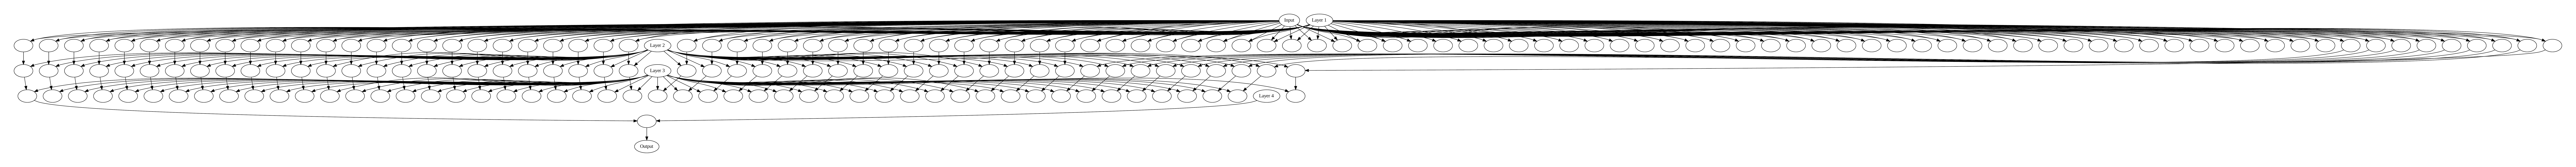

In [20]:
from pdf2image import convert_from_path

images = convert_from_path("model.pdf")
images[0]  # first page

### Evaluating the MSE of our model

MSE formula = (1/n) * Σ(actual – forecast)^2

Where:

    n = number of items,
    Σ = summation notation,
    Actual = original or observed y-value,
    Forecast = y-value from regression.


In [12]:
mean_absolute_error(y_valid, mlp.predict(X_valid))

0.6390062972396082